In [15]:
import pandas as pd
df=pd.read_csv("Admission_Predict.csv")

In [16]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

In [17]:
df.shape

(400, 9)

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
print(df['GRE Score'].min())

In [18]:
#Data Preprocessing
#Chance of admit is not dependent on serial number, therefore we do not need serial number
#for ML purpose

df.drop(['Serial No.'],inplace=True,axis=1)

In [ ]:
df.head()

In [ ]:
print(df['Chance of Admit'])

In [ ]:
print(df.columns)

In [ ]:
print(df['Chance of Admit '])

In [19]:
df.rename(columns={'Chance of Admit ': 'Chance of Admit'},inplace=True)

In [ ]:
print(df.columns)

In [20]:
#X is feature on which outcome y is dependent
print(df.shape)
X=df.drop(['Chance of Admit'],axis=1)
print(X.shape)


(400, 8)
(400, 7)


In [ ]:
X.head()

In [21]:
#y is outcome which we want to predict through Machine Learning
y=df['Chance of Admit']
print(y)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
       ... 
370    0.72
371    0.89
372    0.95
373    0.79
374    0.39
375    0.38
376    0.34
377    0.47
378    0.56
379    0.71
380    0.78
381    0.73
382    0.82
383    0.62
384    0.96
385    0.96
386    0.46
387    0.53
388    0.49
389    0.76
390    0.64
391    0.71
392    0.84
393    0.77
394    0.89
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64


In [22]:
#Now X (Features) and y (Outcome) is ready
#Now split the data into two parts: train data(320 rows) and test data(80 rows)
#Generally testing data is kept as 20%(0.20) to 30%(0.30)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20)

In [23]:
X_train.shape

(320, 7)

In [ ]:
X_train.columns

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [24]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
61,307,101,3,4.0,3.0,8.20,0
130,339,114,5,4.0,4.5,9.76,1
236,325,112,4,4.0,4.5,9.17,1
4,314,103,2,2.0,3.0,8.21,0
40,308,110,3,3.5,3.0,8.00,1


In [25]:
#Normalisation: Scaling 
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler(feature_range=(0,1))
X_train[X_train.columns]=s.fit_transform(X_train[X_train.columns])
X_train.head()
#Only apply transform function on testing data
X_test[X_test.columns]=s.transform(X_test[X_test.columns])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
61,0.34,0.296296,0.50,0.750,0.500,0.450161,0.0
130,0.98,0.777778,1.00,0.750,0.875,0.951768,1.0
236,0.70,0.703704,0.75,0.750,0.875,0.762058,1.0
4,0.48,0.370370,0.25,0.250,0.500,0.453376,0.0
40,0.36,0.629630,0.50,0.625,0.500,0.385852,1.0


In [29]:
#Only these three lines in python will create a Machine Learning
#Model for you
from sklearn.linear_model import LinearRegression
m=LinearRegression()
m.fit(X_train,y_train)

#m object is a ML Model, which can predict outcome, if feature is given
# as input to this

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
c=m.coef_
i=m.intercept_
print(i)

-1.197517547148427


In [23]:
#y=a1*x1+a2*x2+a3*x3+a4*x4+a5*x5+a6*x6+a7*x7+intercept(i)
#a1,a2,a3,a4,a5,a6,a7 is coeficient
a1=c[0]
a2=c[1]
a3=c[2]
a4=c[3]
a5=c[4]
a6=c[5]
a7=c[6]
y_p=a1*337+a2*118+a3*4+a4*4.5+a5*4.5+a6*9.65+a7*1+i
print(y_p)

0.9449497431704557


In [30]:
y_predict=m.predict(X_test)
print(y_predict)

[39.74915234 40.11097902 40.15425248 39.17822224 38.29284554 38.10625925
 41.42600675 40.42233724 38.11880656 38.84935695 38.69045013 38.36600633
 38.19938225 37.7915007  40.73776288 41.6024278  39.74266194 40.78688511
 39.35384489 37.17345383 40.50432974 40.89803524 40.16064632 40.67164609
 38.96883109 37.00083664 43.13000836 39.06412609 36.43956586 39.90736471
 38.71352687 39.69632624 40.8075016  40.45775196 41.84011921 37.49782998
 38.22332249 42.37657764 39.19746721 40.78530137 41.50562146 42.68844516
 36.26790067 38.7985618  39.81717942 42.6230205  41.8738182  42.45062239
 39.02129757 38.24841326 42.29125891 42.27498093 41.99835178 42.66044666
 36.80244158 38.72450384 40.6240433  36.91727429 37.85012213 41.20435163
 40.65906258 37.48834204 40.91754124 40.41764446 39.27421498 42.66796355
 40.19204595 39.85492969 39.10848844 37.3681629  41.16099225 38.75755917
 41.8231777  39.10548306 39.97542231 38.85180578 38.8670348  38.9122061
 38.04081802 42.25400203]


In [ ]:
#y_test is actual outcome directly taken from sample data
#y_predict is predicted outcome by the ML model i.e. m in this case
df1=pd.DataFrame({"Actual": y_test,"Predicted":y_predict })
df1.to_csv("04_Sep_Output.csv")


In [ ]:
#y_test is actual outcome directly taken from sample data
#y_predict is predicted outcome by the ML model i.e. m in this case
df1=pd.DataFrame({"Actual": y_test,"Predicted":y_predict })
df1['error']=df1['Actual']-df1['Predicted']
df1['error']=df1['error'].abs()
df1.to_csv("04_Sep_Output.csv")

In [ ]:
df1.head()

In [ ]:
Mean_Absolute_Error=df1['error'].mean()
print(Mean_Absolute_Error)

In [ ]:
#4.8% is the error of your ML model created using Linear Regression
#Algorithm
#why Error is modified when data is same?

In [ ]:
from sklearn.metrics import mean_absolute_error
e=mean_absolute_error(y_test,y_predict)
print(e)

In [ ]:
#data of a new user or current user who wants to predict the outcome(chance of his admission)
#Deployment of a Machine Learning model
gre=int(input("What is your GRE Score (between 290 to 340):"))
toefl=int(input("What is your TOEFL Score (between 90 to 120):"))
univ=int(input("What is your University Rating ( 1 to 5 ):"))
sop=float(input("Rate your Statement of Purpose ( 1 to 5):"))
lor=float(input("What is strength of  your Letter of Recommendation ( 1 to 5) :"))
cgpa=float(input("What is your CGPA ( 6 to 10):"))
research=int(input("Do You have Research Experience (Enter 0 for No and 1 for Yes:"))

#Very important: the sequence of new data will be exactly same as per training data columns i.e.
#X_train columns
list=[gre,toefl,univ,sop,lor,cgpa,research]

#predict function takes input argument i.e. feature data as Data Frame which may consist
#of many rows or records or entity data

Newdf=pd.DataFrame([list])
y_p=m.predict(Newdf)

print("Your Chance of admission is:",y_p[0]*100-4.81,"  to  ",y_p[0]*100+4.81," Percent")


In [ ]:
y_predict=m.predict(X_train)

In [ ]:
print(y_predict)

In [ ]:
from sklearn.metrics import mean_absolute_error
e=mean_absolute_error(y_train,y_predict)
print(e)

In [ ]:
#Finished entire process of machine learning for this particular problem in
#a simple way

#How can you say that this algorithm is better
#only by experiments
#you make a model using all possible algorithms and test that, find error
#whatever has minimum error, that algo is suitable for your problem.
#Apply algorithm depending on type of problem eg. regression in this case

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
#rfr is the model on basis of this algorithm


In [ ]:
yr_predict=rfr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
e=mean_absolute_error(y_test,yr_predict)
print(e)

In [ ]:
#Algorithm Name: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
#dtr is a ML Model

In [ ]:
ydtr_predict=dtr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
e=mean_absolute_error(y_test,ydtr_predict)
print(e)

In [ ]:
# We have applied three regression algorithms
#We found that error is lowest in case of Linear Regression Algorithm
#that means m is best model for my problem
#therefore final decision is that I will depoly m as my ML Model
#for this model

In [ ]:
#how many algorithms are there
#No one knows why? bcoz research is going on......
#what you know is that it is a regression problem
#So I have to apply regression algorithm

In [ ]:
#Algoirthm Name: Support Vector Regression
from sklearn.svm import SVR
s = SVR()
s.fit(X_train,y_train)

In [ ]:
ys_predict=s.predict(X_test)
from sklearn.metrics import mean_absolute_error
e=mean_absolute_error(y_test,ys_predict)
print(e)

In [ ]:
#Algorithm: Bayesian Ridge Regression is little better than linear regression
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train,y_train)

In [ ]:
ys_predict=br.predict(X_test)
from sklearn.metrics import mean_absolute_error
e=mean_absolute_error(y_test,ys_predict)
print(e)

In [ ]:
#Every ML Algo will have twp functions at minimum:
#Fit Function
#Predict Function

In [45]:
#My Own ML Algo 
import numpy as np
class MyLinearRegression:
    coef=[]
    intercept=0.0
    
    def fit(s,x,y):
        #Some operation on this x and y to find relationship
        #set the value of coef and intercept looking 
        #at the training data
        n=len(x)
        xsq=np.square(x)
        ysq=np.square(y)
        xy=[a*b for a,b in zip(x,y)]
        sigmaxy=sum(xy)
        sigmax=sum(x)
        sigmay=sum(y)
        sigmaxsq=sum(xsq)
        c=(sigmaxy-(sigmax*sigmay)/n)/(sigmaxsq-(sigmax*sigmax/n))
        s.coef.append(c)
        s.intercept=(sigmay/n)-(sigmax/n)*s.coef[0]
        
        print("Data is fitted and model is made")
        
    def predict(s,x):
        i=0
        y=0.0
        for j in x:
            y=x[i]*s.coef[i]+y
            i=i+1
        y=y+s.intercept
        return y
        
x=[1,2,3,4,5]   
y=[4,9,11,15,20]
m=MyLinearRegression()
m.fit(x,y)
y=m.predict([30])
print("predicted value of y is:",y)

        
    

Data is fitted and model is made
predicted value of y is: 114.4


In [46]:
print(m.coef)
print(m.intercept)

[3.8]
0.40000000000000213


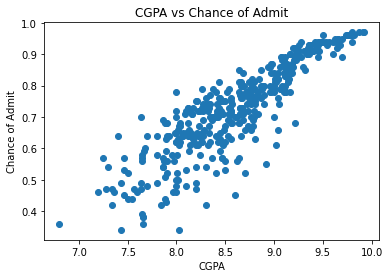

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['CGPA'],df['Chance of Admit'])
plt.title("CGPA vs Chance of Admit")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")

plt.show()


In [27]:
#In class, some fucntions set the member data and some function use that
#member data to do some operation and give output
class my_scale:
    min1=0
    max1=0
    S_max=0
    S_min=0
    
    def __init__(s,a,b):
        s.S_min=a
        s.S_max=b
        
    #Fit formula calculates the value of variable(max,min) which is required
    #to apply formula
    def my_fit_transform(s,data_set):
        s.max1=max(data_set)
        s.min1=min(data_set)
        scale=(s.S_max-s.S_min)/(s.max1-s.min1)
        new_data=[]
        for i in data_set:
            d=scale*(i-s.min1)
            new_data.append(d)
        return new_data
        
    
    #Transform function applies the formula
    def my_transform(s,nd):
        scale=(s.S_max-s.S_min)/(s.max1-s.min1)
        new_data=[]
        for i in nd:
            d=scale*(i-s.min1)
            new_data.append(d)
        return new_data

training_data=[23,45,50,67]
a=my_scale(0,1)
c=a.my_fit_transform(training_data)
b=a.my_transform([34,56])
print(b)
print(c)



[0.25, 0.75]
[0.0, 0.5, 0.6136363636363636, 1.0]


In [ ]:
#if you converted your training data between 0 and 1, then you must convert your
#testing data  as well as new data between 0 and 1 also during 
#prediction time.

100
